# Cycle Sharing Scheme – Understand the Customer

### Trip Dataset
#### The key parameters are:

 -trip_id: unique ID of each trip
 
 -starttime: the time at which customer start bycyling
 
 -stopttime: the time at which customer stop bycyling
 
 -bikeid: unique ID of each bike
 
 -tripduration: time duration of customer's trip
 
 -from_station_name: name of station from which trip starts
 
 -to_station_name: name of station at which trip ends
 
 -from_station_id: unique ID of station from which trip starts
 
 -to_station_id: unique ID of station at which trip ends
 
 -usertype: member or short term pass
 
 -gender: male or female
 
 -birthyear: birth year of the customer
 
 


In [1]:
%matplotlib inline

import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [3]:
data = pd.read_csv('F:\\vrinda\\Python\\trip.csv')

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape

(236065, 12)

In [9]:
data.ndim

2

In [10]:
data.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

Check the length of the data

In [11]:
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [22]:
data.index


Int64Index([ 20239,  20240,  20241,  20259,  20260,  20261,  20262,  20263,
             20264,  20265,
            ...
            128583, 128584, 128585, 128587, 128586, 128588, 128589, 128590,
            128591, 128592],
           dtype='int64', length=236065)

Univariate Analysis to determine the time range of data set<br>
We sort the data frame by `starttime`<br>
what sorting did was to change the position of records within the data frame, and hence the change in positions disturbed the arrangement of the indexes which were earlier in an ascending order. Hence, considering this, we decided to reset the indexes so that the ordered data frame now has indexes in an ascending order. Finally, we printed the date range that started from the first value of starttime and ended with the last value of stoptime

In [26]:
data = data.sort_values(by='starttime',ascending=False)
data

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
128591,141672,9/9/2015 9:55,9/9/2015 9:59,SEA00266,252.431,6th Ave & Blanchard St,Republican St & Westlake Ave N,BT-04,SLU-04,Member,Male,1988.0
128592,141673,9/9/2015 9:55,9/9/2015 10:00,SEA00117,288.925,Pier 69 / Alaskan Way & Clay St,Seattle Aquarium / Alaskan Way S & Elliott Bay...,WF-01,WF-04,Member,Female,1982.0
128590,141671,9/9/2015 9:49,9/9/2015 9:55,SEA00473,359.629,Westlake Ave & 6th Ave,9th Ave N & Mercer St,SLU-15,DPD-01,Member,Male,1970.0
128589,141670,9/9/2015 9:49,9/9/2015 9:54,SEA00328,321.262,Pine St & 9th Ave,Republican St & Westlake Ave N,SLU-16,SLU-04,Member,Male,1983.0
128588,141669,9/9/2015 9:46,9/9/2015 9:54,SEA00460,473.064,E Pine St & 16th Ave,Terry Ave & Stewart St,CH-07,SLU-20,Member,Male,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20260,25132,1/1/2015 10:55,1/1/2015 11:03,SEA00391,470.801,E Pine St & 16th Ave,7th Ave & Union St,CH-07,CBD-03,Member,Male,1980.0
20259,25131,1/1/2015 10:14,1/1/2015 10:33,SEA00204,1145.254,Summit Ave E & E Republican St,Occidental Park / Occidental Ave S & S Washing...,CH-03,PS-04,Short-Term Pass Holder,NaN,NaN
20241,25093,1/1/2015 0:44,1/1/2015 0:48,SEA00124,255.004,Harvard Ave & E Pine St,REI / Yale Ave N & John St,CH-09,SLU-01,Member,Male,1987.0
20240,25092,1/1/2015 0:37,1/1/2015 0:44,SEA00267,459.469,Harvard Ave & E Pine St,Cal Anderson Park / 11th Ave & Pine St,CH-09,CH-08,Member,Male,1991.0


In [32]:
data = data.sort_values(by='trip_id')
#data = data.sort_values(by='starttime')
data.reset_index()
data.head(2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0


In [35]:
data.tail(2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
236063,255244,8/31/2016 23:49,9/1/2016 0:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
236064,255245,8/31/2016 23:49,9/1/2016 0:20,SEA00442,1896.031,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


In [12]:
print ('Date range of dataset: %s - %s'%(data.loc[0, 'starttime'], data.loc[len(data)-1, 'stoptime']))

Date range of dataset: 10/13/2014 10:31 - 9/1/2016 0:20


There are two insights. One is that the data ranges from October 2014 up till September 2016 (i.e., three years of data). Moreover, it seems like the cycle sharing service is usually operational beyond the standard 9 to 5 business hours.

new users would be short-term pass holders however once they try out the service and become satisfied would ultimately avail the membership to receive the perks and benefits offered<br>
plot a bar graph of trip frequencies by user type

groupby groups the data by a given field, that is, usertype, in the current situation<br>
size counts trips falling within each of the grouped usertypes

In [14]:
#groupby_user = data.groupby('usertype')
groupby_user = data.groupby('usertype').size()  #use size() to count how many items are in each group
groupby_user


usertype
Member                    146171
Short-Term Pass Holder     89894
dtype: int64

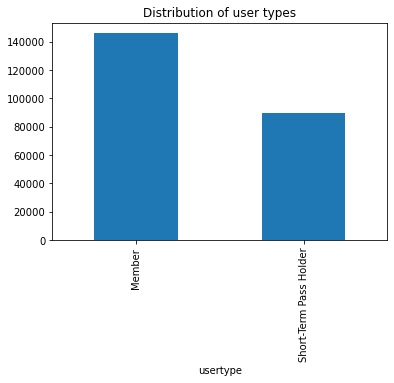

In [38]:
groupby_user.plot.bar(title = 'Distribution of user types')

You may want know more about her target customers to whom to company’s marketing message will be targetted to<br>
Find out the gender and age groups that are most likely to ride a cycle or the ones that are more prone to avail the service.<br>
Fing out the distribution of gender and birth years

In [15]:
groupby_gender = data.groupby('gender').size()
groupby_gender

gender
Female     30330
Male      112940
Other       2901
dtype: int64

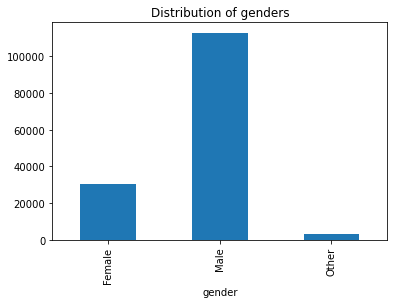

In [16]:
groupby_gender.plot.bar(title = 'Distribution of genders')

In [18]:
data = data.sort_values(by='birthyear')
data.head(3)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
212893,231080,7/8/2016 16:22,7/8/2016 16:53,SEA00423,1817.524,E Pine St & 16th Ave,E Pine St & 16th Ave,CH-07,CH-07,Member,Female,1931.0
116857,129270,8/15/2015 18:07,8/15/2015 18:16,SEA00393,521.017,2nd Ave & Pine St,Terry Ave & Stewart St,CBD-13,SLU-20,Member,Male,1936.0
133730,147105,9/20/2015 17:04,9/20/2015 17:12,SEA00460,475.856,2nd Ave & Pine St,Terry Ave & Stewart St,CBD-13,SLU-20,Member,Male,1936.0


In [19]:
data.tail(3)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
236062,255243,8/31/2016 23:47,9/1/2016 0:20,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
236063,255244,8/31/2016 23:49,9/1/2016 0:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
236064,255245,8/31/2016 23:49,9/1/2016 0:20,SEA00442,1896.031,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


In [20]:
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear

birthyear
1931.0      1
1936.0      7
1939.0     40
1942.0      2
1943.0     11
         ... 
1995.0    908
1996.0    338
1997.0    101
1998.0     32
1999.0      6
Length: 61, dtype: int64

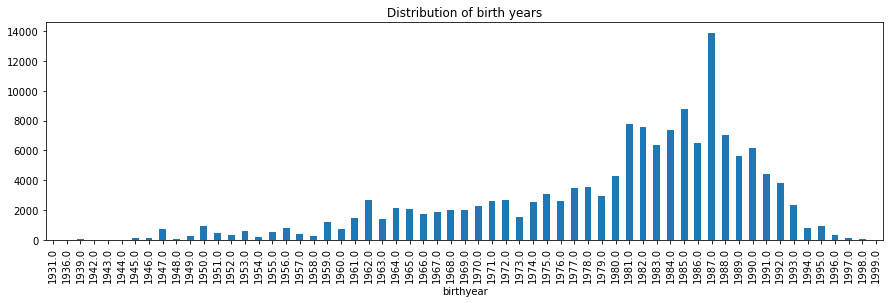

In [21]:
groupby_birthyear.plot.bar(title = 'Distribution of birth years', figsize = (15,4))

millenials are supposed to make a conscious decision, a decision they will remain loyal to for a long period. Hence we mat assume that the most millennials would be members rather than short-term pass holders. Based on data below, it appeared to be valid, and we can make sure that the brand engaged millennials as part of the marketing plan.

In [23]:
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear']<=1994)]
data_mil.shape

(102677, 12)

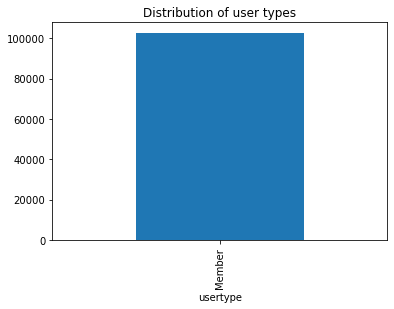

In [24]:
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title = 'Distribution of user types')

### Multivariate Analysis 
Multivariate analysis refers to incorporation of multiple exploratory variables to understand the behavior of a response variable. This seems to be the most feasible and realistic approach considering the fact that entities within this world are usually interconnected. Thus the variability in response variable might be affected by the variability in the interconnected exploratory variables<br>

Who completed more trips male or female. Draw a stacked bar graph (i.e., a bar graph for birth year, but each bar having two colors, one for each gender)

We at first transformed the data frame by **unstacking**, that is, splitting, the gender column into three columns, that is, Male, Female, and Other. This meant that for each of the birth years we had the trip count for all three gender types. Finally, a stacked bar graph was created by using this transformed data frame. 

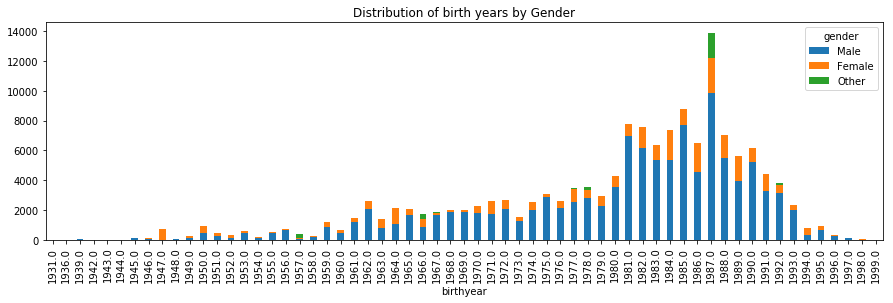

In [9]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title = 'Distribution of birth years by Gender', stacked=True, figsize = (15,4))

It seemed as if males were dominating the distribution. It made sense as well. No? Well, it did; as seen earlier, that majority of the trips were availed by males, hence this skewed the distribution in favor of males. However, subscribers born in 1947 were all females. Moreover, those born in 1964 and 1994 were dominated by females as wel

what the distribution of user type was for the other age generations. Is it that the majority of people in the other age generations were short-term pass holders?

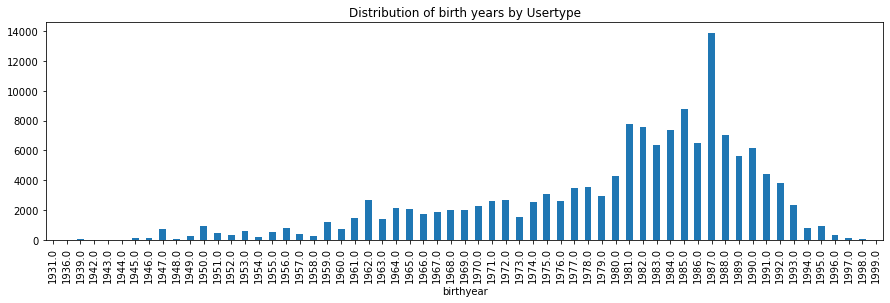

In [25]:
groupby_birthyear_user = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)

groupby_birthyear_user['Member'].plot.bar(title = 'Distribution of birth years by Usertype', stacked=True, figsize = (15,4))

The graph shows the distribution of only one user type and not two (i.e., membership and short-term pass holders)? Does this mean that birth year information was only present for only one user type?
Validation If We Don’t Have Birth Year Available for Short-Term Pass Holders

In [26]:
data[data['usertype']==['Short-Term Pass Holder']['birthyear'].isnull().values.all() 
#all() returns whether all values are true

True

We first sliced the data frame to consider only short-term pass holders. Then we went forward to find out if all the values in birth year are missing (i.e., null) for this slice. Members have to provide details like birth year when applying for the membership, something which is not a prerequisite for short-term pass holders. WE decided to test this deduction by checking if gender is available for short-term pass holders or not

In [27]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

how the frequency of trips vary across date and time (i.e., a time series analysis). Trip start time is given with the data, but to make a time series plot, we had to transform the date from string to date time format. Split the datetime into date components (i.e., year, month, day, and hour )

At first we converted start time column of the dataframe into a list. Next we converted the string dates into python datetime objects. We then converted the list into a series object and converted the dates from datetime object to pandas date object. The time components of year, month, day and hour were derived from the list with the datetime objects. 

In [31]:
List_ = list(data['starttime'])
List_



['7/8/2016 16:22',
 '8/15/2015 18:07',
 '9/20/2015 17:04',
 '9/20/2015 16:06',
 '8/16/2015 17:21',
 '4/3/2016 19:02',
 '11/23/2014 16:46',
 '8/15/2015 17:27',
 '5/15/2015 16:54',
 '11/8/2015 13:08',
 '7/27/2016 18:36',
 '6/2/2016 18:17',
 '9/22/2015 11:25',
 '4/18/2016 11:52',
 '5/30/2015 12:25',
 '5/3/2015 11:49',
 '5/11/2015 6:13',
 '5/8/2016 12:18',
 '5/24/2016 18:32',
 '6/21/2015 12:11',
 '8/14/2016 13:22',
 '7/19/2015 11:57',
 '5/26/2016 18:21',
 '7/19/2015 11:07',
 '6/4/2016 13:19',
 '6/21/2015 11:27',
 '3/26/2016 12:15',
 '5/29/2016 11:15',
 '6/19/2016 11:34',
 '6/2/2015 16:01',
 '5/10/2015 11:46',
 '6/28/2015 11:35',
 '4/26/2015 10:58',
 '5/31/2015 12:18',
 '6/7/2015 11:31',
 '6/13/2016 18:48',
 '9/6/2015 13:12',
 '5/25/2015 10:30',
 '8/28/2016 11:57',
 '3/26/2016 12:34',
 '5/10/2015 11:00',
 '8/9/2015 13:20',
 '9/6/2015 13:55',
 '8/14/2016 12:39',
 '8/9/2015 12:38',
 '6/7/2015 10:56',
 '7/26/2016 18:42',
 '6/28/2015 12:18',
 '11/7/2014 15:46',
 '2/24/2015 14:22',
 '10/27/2014 

In [32]:
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
List_

[datetime.datetime(2016, 7, 8, 16, 22),
 datetime.datetime(2015, 8, 15, 18, 7),
 datetime.datetime(2015, 9, 20, 17, 4),
 datetime.datetime(2015, 9, 20, 16, 6),
 datetime.datetime(2015, 8, 16, 17, 21),
 datetime.datetime(2016, 4, 3, 19, 2),
 datetime.datetime(2014, 11, 23, 16, 46),
 datetime.datetime(2015, 8, 15, 17, 27),
 datetime.datetime(2015, 5, 15, 16, 54),
 datetime.datetime(2015, 11, 8, 13, 8),
 datetime.datetime(2016, 7, 27, 18, 36),
 datetime.datetime(2016, 6, 2, 18, 17),
 datetime.datetime(2015, 9, 22, 11, 25),
 datetime.datetime(2016, 4, 18, 11, 52),
 datetime.datetime(2015, 5, 30, 12, 25),
 datetime.datetime(2015, 5, 3, 11, 49),
 datetime.datetime(2015, 5, 11, 6, 13),
 datetime.datetime(2016, 5, 8, 12, 18),
 datetime.datetime(2016, 5, 24, 18, 32),
 datetime.datetime(2015, 6, 21, 12, 11),
 datetime.datetime(2016, 8, 14, 13, 22),
 datetime.datetime(2015, 7, 19, 11, 57),
 datetime.datetime(2016, 5, 26, 18, 21),
 datetime.datetime(2015, 7, 19, 11, 7),
 datetime.datetime(2016, 6,

In [33]:
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_mod']

212893   2016-07-08 16:22:00
116857   2015-08-15 18:07:00
133730   2015-09-20 17:04:00
133697   2015-09-20 16:06:00
117423   2015-08-16 17:21:00
                 ...        
236060   2016-08-31 23:34:00
236061   2016-08-31 23:48:00
236062   2016-08-31 23:47:00
236063   2016-08-31 23:49:00
236064   2016-08-31 23:49:00
Name: starttime_mod, Length: 236065, dtype: datetime64[ns]

In [35]:
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_date']

212893    2016-07-08
116857    2015-08-15
133730    2015-09-20
133697    2015-09-20
117423    2015-08-16
             ...    
236060    2016-08-31
236061    2016-08-31
236062    2016-08-31
236063    2016-08-31
236064    2016-08-31
Name: starttime_date, Length: 236065, dtype: object

In [36]:
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_year']

212893    2016
116857    2015
133730    2015
133697    2015
117423    2015
          ... 
236060    2016
236061    2016
236062    2016
236063    2016
236064    2016
Name: starttime_year, Length: 236065, dtype: int64

In [37]:
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_month']

212893    7
116857    8
133730    9
133697    9
117423    8
         ..
236060    8
236061    8
236062    8
236063    8
236064    8
Name: starttime_month, Length: 236065, dtype: int64

In [38]:
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_day']

212893     8
116857    15
133730    20
133697    20
117423    16
          ..
236060    31
236061    31
236062    31
236063    31
236064    31
Name: starttime_day, Length: 236065, dtype: int64

In [39]:
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)
data['starttime_hour']

212893    16
116857    18
133730    17
133697    16
117423    17
          ..
236060    23
236061    23
236062    23
236063    23
236064    23
Name: starttime_hour, Length: 236065, dtype: int64

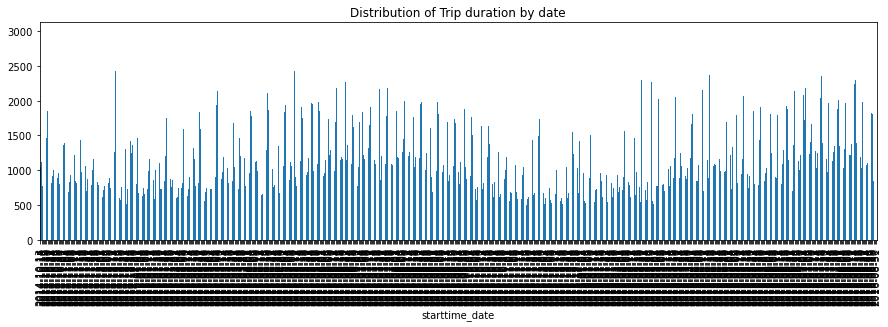

In [40]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by date', figsize = (15,4))

Determining the measures of centers using the statistics package will require us to transform the input data structure to a list type.

In [53]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print ('Mean of trip duration: %f'%statistics.mean(trip_duration))
print ('Median of trip duration: %f'%statistics.median(trip_duration))
print ('Mode of station originating from: %s'%statistics.mode(station_from))

Mean of trip duration: 592.980479
Median of trip duration: 479.149000
Mode of station originating from: E Pine St & 16th Ave


The output revealed that most trips originated from Pier 69/Alaskan Way & Clay St station. Hence this was the ideal location for running promotional campaigns targeted to existing customers. Moreover, the output showed the mean to be greater than that of the mean.<br>
why the average (i.e., mean) is greater than the central value (i.e., median).<br>
this might be either due to some extreme values after the median or due to the majority of values lying after the median.<br> plot a distribution of the trip durations in order to determine which premise holds true .

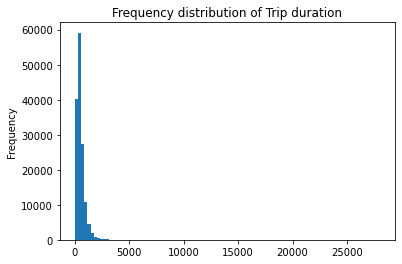

In [52]:
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')

The distribution has only one peak (i.e., mode). The distribution is not symmetric and has majority of values toward the right-hand side of the mode. These extreme values toward the right are negligible in quantity, but their extreme nature tends to pull the mean toward themselves. Thus the reason why the mean is greater than the median<br>
The distribution is referred to as a **normal distribution.**

Find out whether outliers exist within our dataset—more precisely in the tripduration feature. For that first create a box plot by writing code to see the outliers visually and then checked the same by applying the interval calculation method

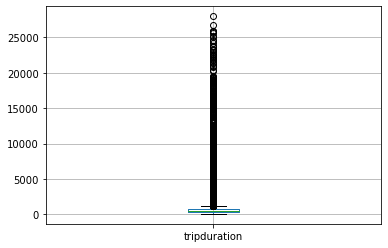

In [50]:
box = data.boxplot(column=['tripduration'])

See a huge number of outliers in trip duration from the box plot. She asked Eric if he could determine the proportion of trip duration values which are outliers. She wanted to know if outliers are a tiny or majority portion of the dataset

In [56]:
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25
print ('Proportion of values as outlier: %f percent'%(
(len(data) - len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of values as outlier: 5.016180 percent


Q3 refers to the 75th percentile and Q1 refers to the 25th percentile. Hence we use the numpy.percentile() method to determine the values for Q1 and Q3. Next we compute the IQR by subtracting both of them. Then we determine the subset of values by applying the interval. We then used the formula to get the number of outliers. 
In our code, len(data) determines Length of all values and Length of all non outliers values is determined by `len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)]))`

Considering the time series nature of the dataset, removing these outliers wouldn’t be an option. The only option we could rely on was to apply transformation to these outliers to negate their extreme nature. However, we are interested in observing the mean of the non-outlier values of trip duration. This we can compare with the mean of all values calculated earlier

In [57]:
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print ('Mean of trip duration: %f'%mean_trip_duration)

Mean of trip duration: 506.376506


The mean of non-outlier trip duration values in (i.e., approximately 712) is considerably lower than that calculated in the presence of outliers in Listing 1-15 (i.e., approximately 1,203). This best describes the notion that mean is highly affected by the presence of outliers in the dataset.

upper_whisker is the maximum value of the right (i.e., positive) whisker i.e. boundary uptill which all values are valid and any value greater than that is considered as an outlier

WE are interested to see the outcome statistics once the outliers were transformed into valid value sets. Hence we decided to start with a simple outlier transformation to the mean of valid values

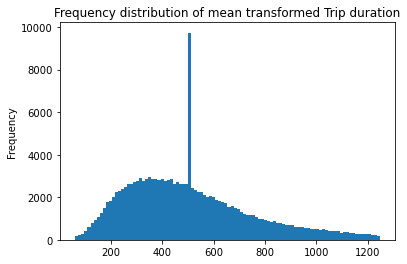

In [58]:
def transform_tripduration(x):

    if x > upper_whisker:
        return mean_trip_duration
    return x

data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))

data['tripduration_mean']

data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

We initialized a function by the name of transform_tripduration . The function will check if a trip duration value is greater than the upper whisker boundary value, and if that is the case it will replace it with the mean. Next we add tripduration_mean as a new column to the data frame. We did so by custom modifying the already existing tripduration column by applying the transform_tripduration function. 

the skewness has now decreased to a great extent after the transformation. Moreover, the majority of the observations have a tripduration of 712 primarily because all values greater than the upper whisker boundary are now converted into the mean of the non-outlier values calculated. We are now interested in understanding how the center of measures appear for this transformed distribution. Hence we came up with the code

In [59]:
print('Mean of trip duration: %f'%data['tripduration_mean'].mean())
print('Standard deviation of trip duration: %f'%data['tripduration_mean'].std())
print('Median of trip duration: %f'%data['tripduration_mean'].median())

Mean of trip duration: 506.376506
Standard deviation of trip duration: 242.939194
Median of trip duration: 479.149000


In [64]:
data['age'] = data['starttime_year'] - data['birthyear']
data.head(2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,starttime_mod,starttime_date,starttime_year,starttime_month,starttime_day,starttime_hour,tripduration_mean,age
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13 10:31:00,2014-10-13,2014,10,13,10,985.935,54.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13 10:32:00,2014-10-13,2014,10,13,10,926.375,44.0


We were expecting the mean to appear the same as previous because of the mean transformation of the outlier values. WE knew that the hike at 711.7 is the mode, which meant that after the transformation the mean is the same as that of the mode. The thing that surprised the most was that the median is approaching the mean, which means that the positive skewness we saw in is not that strong.

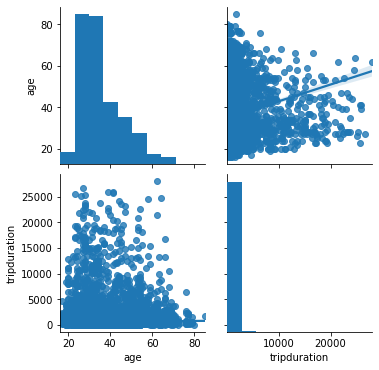

In [65]:
data = data.dropna()
seaborn.pairplot(data, vars=['age', 'tripduration'], kind='reg')

Pearson R correlation into practice and decided to make a scatter plot between the two quantities for them to see the relationship visually.

In [66]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

#data['age'] = data['starttime_year'] - data['birthyear']

correlations = data[['tripduration','age']].corr(method='pearson')
print(correlations)

              tripduration    age
tripduration         1.000  0.058
age                  0.058  1.000


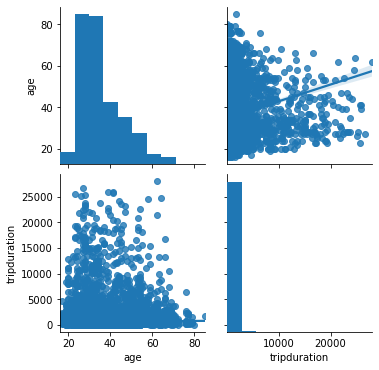

In [67]:
data = data.dropna()
seaborn.pairplot(data, vars=['age', 'tripduration'], kind='reg') #kind has 2 possible values scatter, reg

In [68]:
for cat in ['gender','usertype']:
    print ('Category: %s\n'%cat)
    groupby_category = data.groupby(['starttime_date', cat])['starttime_date'].count().unstack(cat)
    groupby_category = groupby_category.dropna()
    category_names = list(groupby_category.columns)

    for comb in [(category_names[i],category_names[j]) for i in range(len(category_names)) for j in range(i+1, len(category_names))]:

        print ('%s %s'%(comb[0], comb[1]))
        t_statistics = stats.ttest_ind(list(groupby_category[comb[0]]), list(groupby_category[comb[1]]))
        print ('Statistic: %f, P value: %f'%(t_statistics.statistic, t_statistics.pvalue))
        print ('\n')

Category: gender

Female Male
Statistic: -38.573753, P value: 0.000000


Female Other
Statistic: 48.234386, P value: 0.000000


Male Other
Statistic: 53.180282, P value: 0.000000


Category: usertype



# THANK YOU!